In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
house_df_org = pd.read_csv('house_price.csv')
house_df_org.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [6]:
house_df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house_df = house_df_org.copy()

In [8]:
house_df.isnull() #null값이면 true

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [10]:
house_df.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

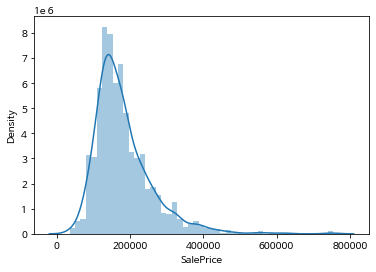

In [11]:
sns.distplot(house_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

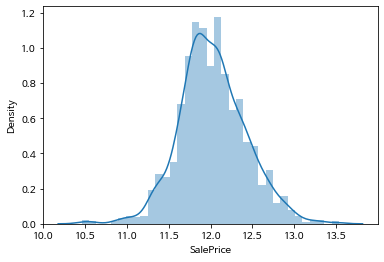

In [14]:
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [15]:
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [16]:
house_df.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],
              inplace=True)

In [21]:
house_df.isnull().sum()[house_df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [19]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
house_df.dtypes[null_column_count.index]

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [20]:
null_column_count.index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [27]:
house_df.fillna(house_df.mean(),inplace=True)

In [28]:
house_df.isnull().sum()[house_df.isnull().sum()>0]
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
house_df.dtypes[null_column_count.index]
null_column_count.index

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [30]:
house_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [31]:
house_df.shape

(1460, 75)

In [32]:
house_df_ohe = pd.get_dummies(house_df)

In [33]:
house_df_ohe.shape

(1460, 271)

In [34]:
house_df_ohe.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=271)

In [37]:
house_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [38]:
house_df_ohe.isnull().sum().sort_values(ascending=False)[:5]

MSSubClass      0
BsmtCond_Gd     0
ExterCond_Gd    0
ExterCond_Po    0
ExterCond_TA    0
dtype: int64

In [42]:
def get_rmse(model):
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(f'{model.__class__.__name__}로그변환된 RMSE: {rmse:.3f}')
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [43]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [44]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(columns=['SalePrice'])
X_train,X_test,y_train,y_test = train_test_split(X_features,
                                                y_target,
                                                test_size=0.2,
                                                random_state=156)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)
models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression로그변환된 RMSE: 0.132
Ridge로그변환된 RMSE: 0.128
Lasso로그변환된 RMSE: 0.176


[0.1318957657915422, 0.12750846334053031, 0.17628250556471395]

In [49]:
def get_top_bottom_coef(model,n=10):
    coef = pd.Series(model.coef_,index=X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high,coef_low

In [50]:
def visualize_coefficient(models):
    fig,axs = plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    for i_num,model in enumerate(models):
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        axs[i_num].set_title(model.__class__.__name__+'Coeffiecents',size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

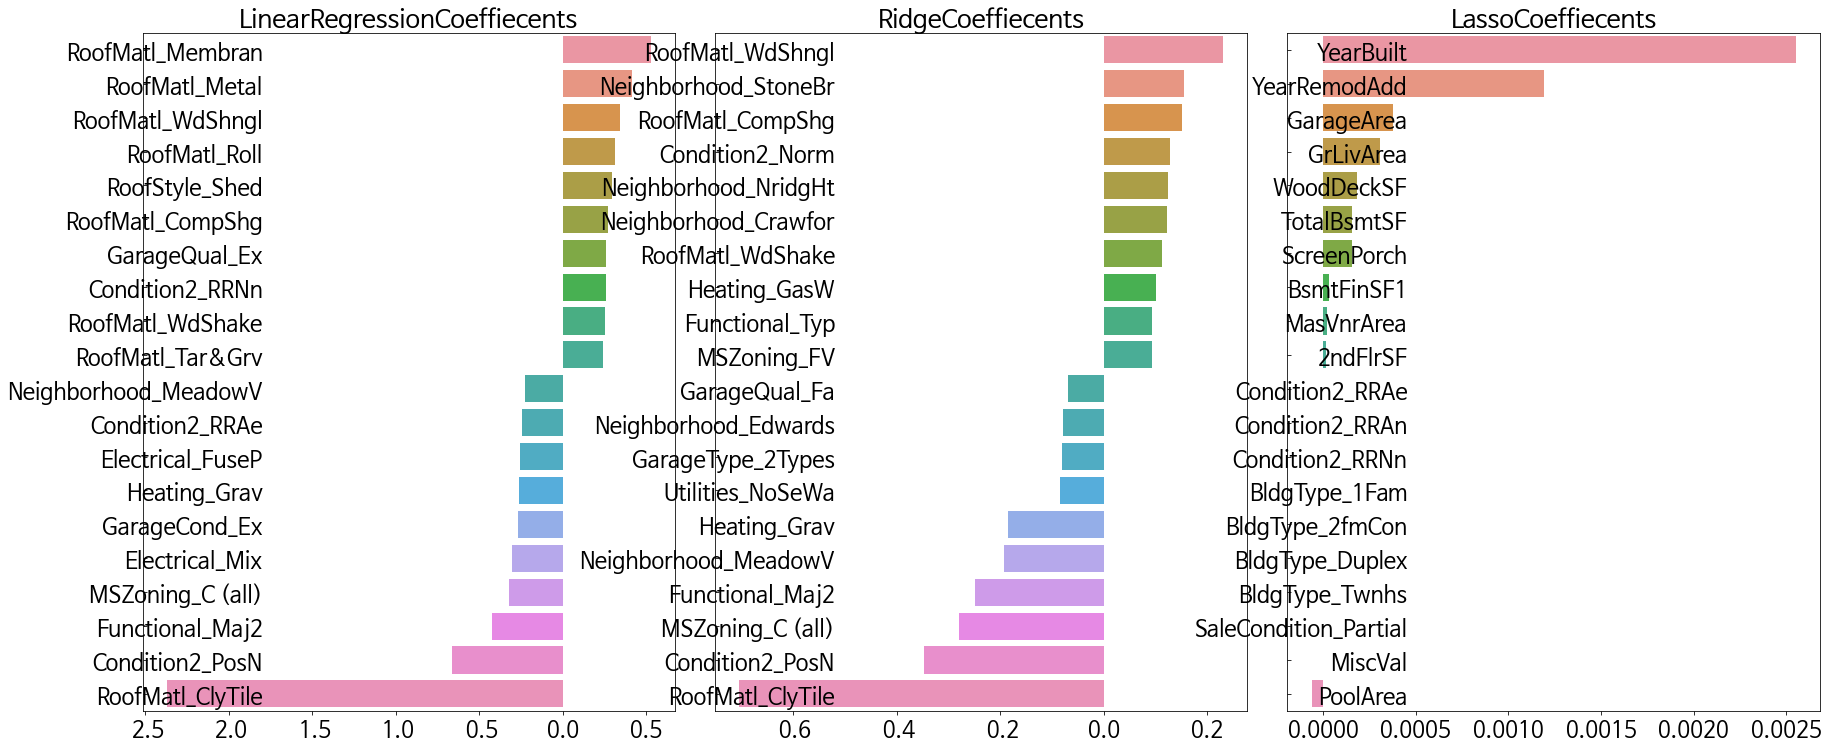

In [51]:
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [52]:
from sklearn.model_selection import cross_val_score

In [59]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,
                                            X_features,
                                            y_target,
                                            scoring='neg_mean_squared_error',
                                           cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'{np.round(rmse_list,3)}')
        print(f'{rmse_avg:.3f}')

In [60]:
models = [lr_reg,ridge_reg,lasso_reg]
get_avg_rmse_cv(models)

[0.135 0.165 0.168 0.111 0.198]
0.155
[0.117 0.154 0.142 0.117 0.189]
0.144
[0.161 0.204 0.177 0.181 0.265]
0.198


### p363

In [61]:
from sklearn.model_selection import GridSearchCV

In [68]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model,
                              param_grid=params,
                              scoring='neg_mean_squared_error',
                              cv=5)
    grid_model.fit(X_features,y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print(f'{grid_model.__class__.__name__} 평균 rmse:{rmse} 최적 alpha:{grid_model.best_params_}')

In [70]:
ridge_params ={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params ={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

GridSearchCV 평균 rmse:0.14176729913304403 최적 alpha:{'alpha': 12}
GridSearchCV 평균 rmse:0.14198359088571494 최적 alpha:{'alpha': 0.001}


In [71]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression로그변환된 RMSE: 0.132
Ridge로그변환된 RMSE: 0.124
Lasso로그변환된 RMSE: 0.120


[0.1318957657915422, 0.12387044279987386, 0.11995999974065165]

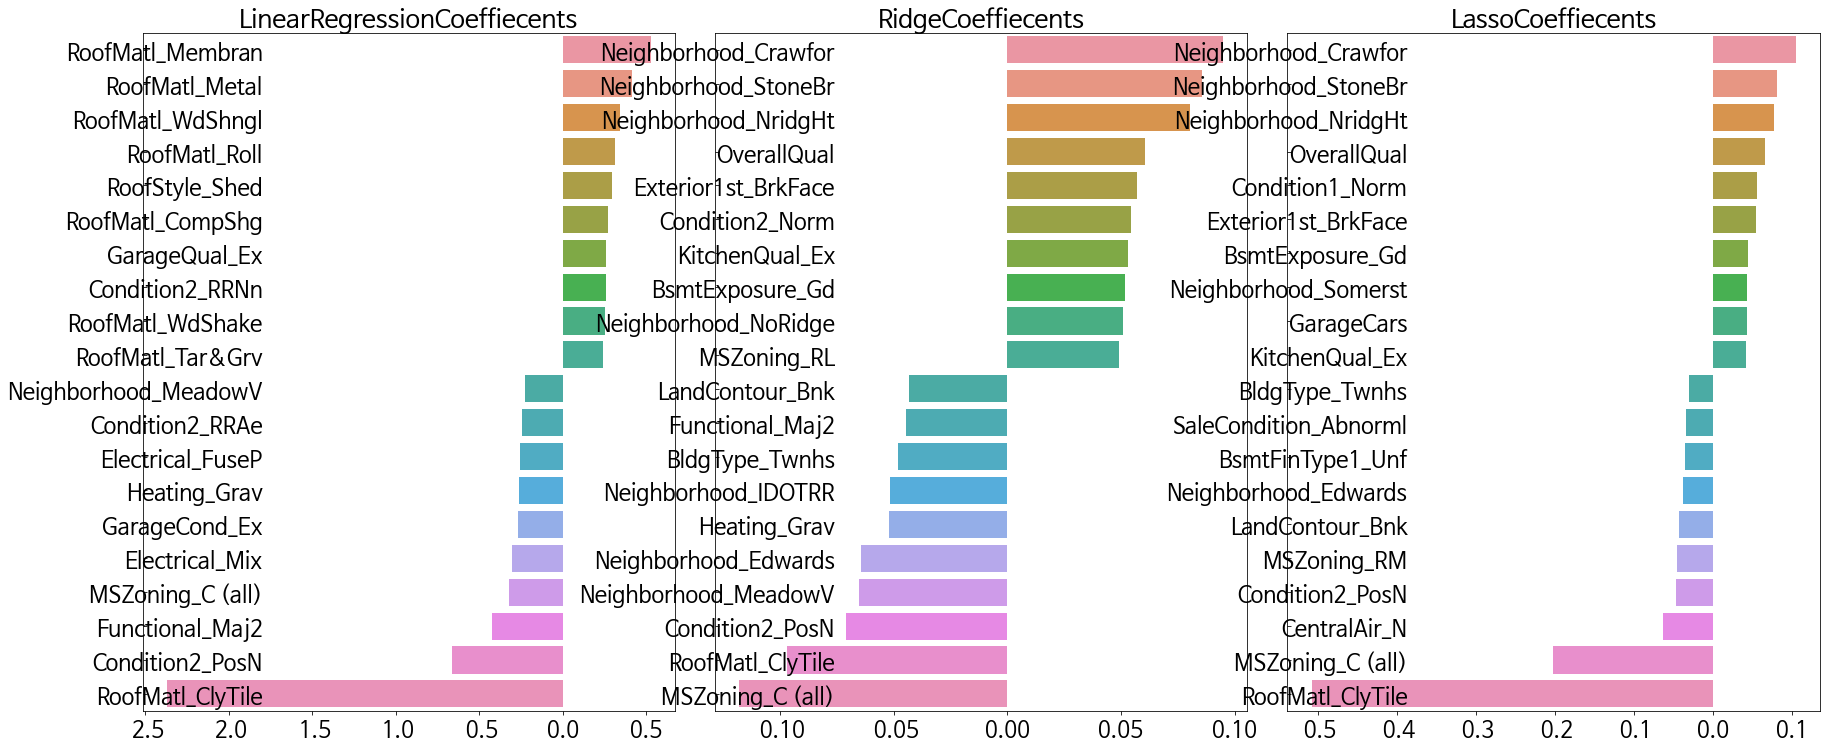

In [72]:
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

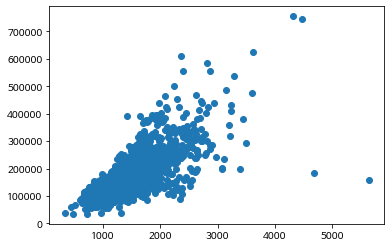

In [73]:
plt.scatter(x=house_df_org['GrLivArea'],y=house_df_org['SalePrice'])

In [74]:
cond1 = house_df_ohe['GrLivArea']>4000
cond2 = house_df_ohe['SalePrice']<np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index
outlier_index

Int64Index([523, 1298], dtype='int64')

In [75]:
house_df_ohe.drop(index=outlier_index,inplace=True)

In [76]:
house_df_ohe.shape

(1458, 271)

In [77]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(columns=['SalePrice'])
X_train,X_test,y_train,y_test = train_test_split(X_features,
                                                y_target,
                                                test_size=0.2,
                                                random_state=156)

In [78]:
ridge_params ={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params ={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

GridSearchCV 평균 rmse:0.11413122076804937 최적 alpha:{'alpha': 15}
GridSearchCV 평균 rmse:0.11362870587980754 최적 alpha:{'alpha': 0.001}


In [79]:
#2개만 제거했는데도 이상치가 낮아지며 더 좋음

In [80]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha=15)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression로그변환된 RMSE: 0.128
Ridge로그변환된 RMSE: 0.103
Lasso로그변환된 RMSE: 0.102


[0.1282537684463082, 0.10271076726751245, 0.10164576101982138]

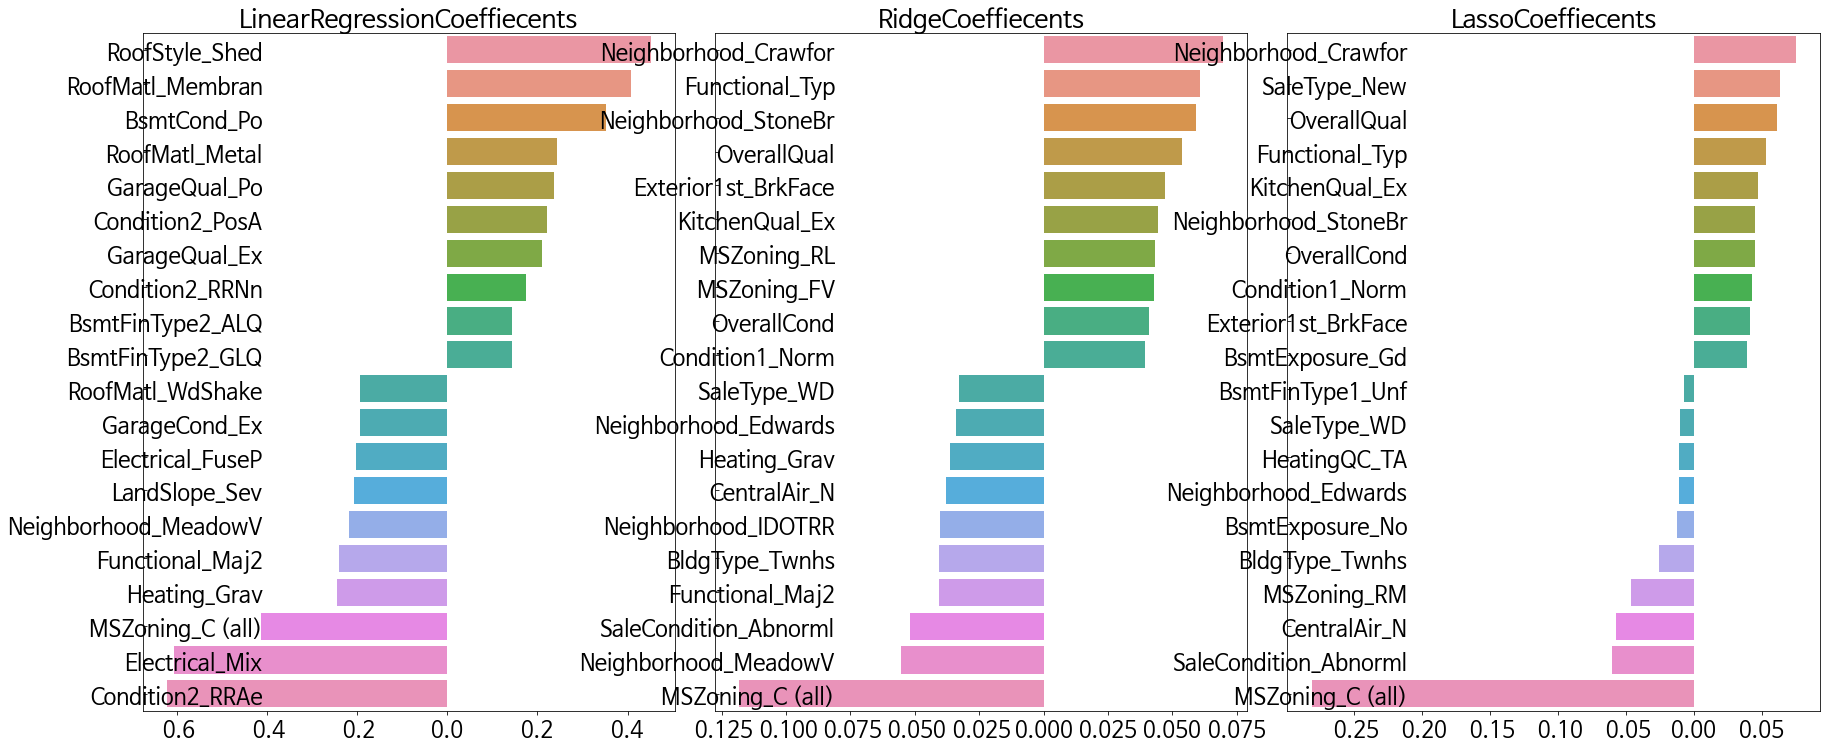

In [81]:
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [86]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_values = preds[key]
        mse = mean_squared_error(y_test,pred_values)
        rmse = np.sqrt(mse)
        print(f'{key}모델의 rmse:{rmse}')

In [91]:
ridge_reg = Ridge(alpha=15)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)
pred = 0.4*ridge_pred+0.6*lasso_pred
preds = {'최종 혼합':pred,
        'Ridge':ridge_pred,
        'Lasso':lasso_pred}
get_rmse_pred(preds)

최종 혼합모델의 rmse:0.10111920427637226
Ridge모델의 rmse:0.10271076726751245
Lasso모델의 rmse:0.10164576101982138
